In [2]:
import pandas as pd

### Raw Dataset 

In [1]:
data_url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
raw_data = pd.read_csv(data_url, sep=",")

In [4]:
raw_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
raw_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Data Understanding

In [37]:
raw_data["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [38]:
raw_data["people_vaccinated"].unique()

array([     nan,       0.,    8200., ..., 6277180., 6278211., 6281041.])

In [39]:
raw_data["total_cases"].unique()

array([5.00000e+00, 8.00000e+00, 1.10000e+01, ..., 2.55049e+05,
       2.55136e+05, 2.55309e+05])

### Data Preparation

In [159]:
processed_data = raw_data.loc[:, ["date", "location", "population", "total_cases", "people_vaccinated"]]

In [160]:
processed_data.head()

,date,location,population,total_cases,people_vaccinated
0,2020-02-24,Afghanistan,39835428.0,5.0,NaN
1,2020-02-25,Afghanistan,39835428.0,5.0,NaN
2,2020-02-26,Afghanistan,39835428.0,5.0,NaN
3,2020-02-27,Afghanistan,39835428.0,5.0,NaN
4,2020-02-28,Afghanistan,39835428.0,5.0,NaN


In [161]:
processed_data["people_vaccinated"] = processed_data["people_vaccinated"].interpolate(method='pad')

In [162]:
processed_data["people_vaccinated"] = processed_data["people_vaccinated"].fillna(0)

In [163]:
processed_data.head()

,date,location,population,total_cases,people_vaccinated
0,2020-02-24,Afghanistan,39835428.0,5.0,0.0
1,2020-02-25,Afghanistan,39835428.0,5.0,0.0
2,2020-02-26,Afghanistan,39835428.0,5.0,0.0
3,2020-02-27,Afghanistan,39835428.0,5.0,0.0
4,2020-02-28,Afghanistan,39835428.0,5.0,0.0


In [164]:
pd.isnull(processed_data["people_vaccinated"]).any()

False

In [165]:
pd.isnull(processed_data["total_cases"]).any()

True

In [166]:
processed_data["total_cases"] = processed_data["total_cases"].fillna(0)

In [167]:
pd.isnull(processed_data["total_cases"]).any()

False

In [168]:
country_list=['Germany',
              'India',
              'United States',
              'United Kingdom'
             ] 

In [169]:
processed_data = processed_data.loc[processed_data["location"].isin(country_list)]
processed_data.reset_index(drop=True)

,date,location,population,total_cases,people_vaccinated
0,2020-01-27,Germany,83900471.0,1.0,1630125.0
1,2020-01-28,Germany,83900471.0,4.0,1630125.0
2,2020-01-29,Germany,83900471.0,4.0,1630125.0
3,2020-01-30,Germany,83900471.0,4.0,1630125.0
4,2020-01-31,Germany,83900471.0,5.0,1630125.0
...,...,...,...,...,...
3513,2022-06-20,United States,332915074.0,86297081.0,259422786.0
3514,2022-06-21,United States,332915074.0,86452232.0,259426758.0
3515,2022-06-22,United States,332915074.0,86636306.0,259426758.0
3516,2022-06-23,United States,332915074.0,86757621.0,259426758.0


In [170]:
processed_data["location"].unique()

array(['Germany', 'India', 'United Kingdom', 'United States'],
      dtype=object)

In [171]:
processed_data["total_cases_rate"] = processed_data["total_cases"]/processed_data["population"]
processed_data["people_vaccinated_rate"] = processed_data["people_vaccinated"]/processed_data["population"]

In [172]:
processed_data

,date,location,population,total_cases,people_vaccinated,total_cases_rate,people_vaccinated_rate
66278,2020-01-27,Germany,83900471.0,1.0,1630125.0,1.191888e-08,0.019429
66279,2020-01-28,Germany,83900471.0,4.0,1630125.0,4.767554e-08,0.019429
66280,2020-01-29,Germany,83900471.0,4.0,1630125.0,4.767554e-08,0.019429
66281,2020-01-30,Germany,83900471.0,4.0,1630125.0,4.767554e-08,0.019429
66282,2020-01-31,Germany,83900471.0,5.0,1630125.0,5.959442e-08,0.019429
...,...,...,...,...,...,...,...
186059,2022-06-20,United States,332915074.0,86297081.0,259422786.0,2.592165e-01,0.779246
186060,2022-06-21,United States,332915074.0,86452232.0,259426758.0,2.596825e-01,0.779258
186061,2022-06-22,United States,332915074.0,86636306.0,259426758.0,2.602355e-01,0.779258
186062,2022-06-23,United States,332915074.0,86757621.0,259426758.0,2.605999e-01,0.779258


### Data Visualization

#### Confirmed cases

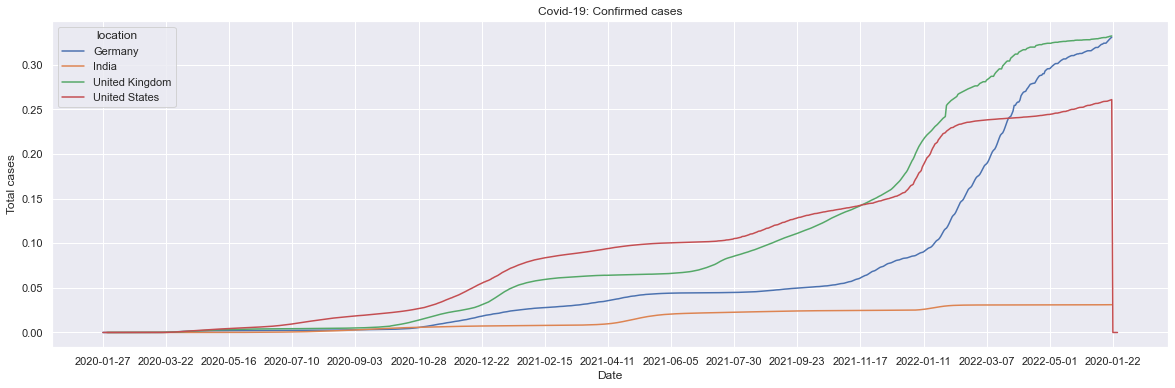

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=55.0) # To put a tick every seven days
plt.figure(figsize=(20, 6))  # to change the size of the graph
plt.title(f"Covid-19: Confirmed cases")
plt.ylabel("Total cases")
plt.xlabel("Date")
ax = sns.lineplot(data=processed_data, x="date", y="total_cases_rate", hue="location")
ax.xaxis.set_major_locator(loc)

#### Vaccination rate

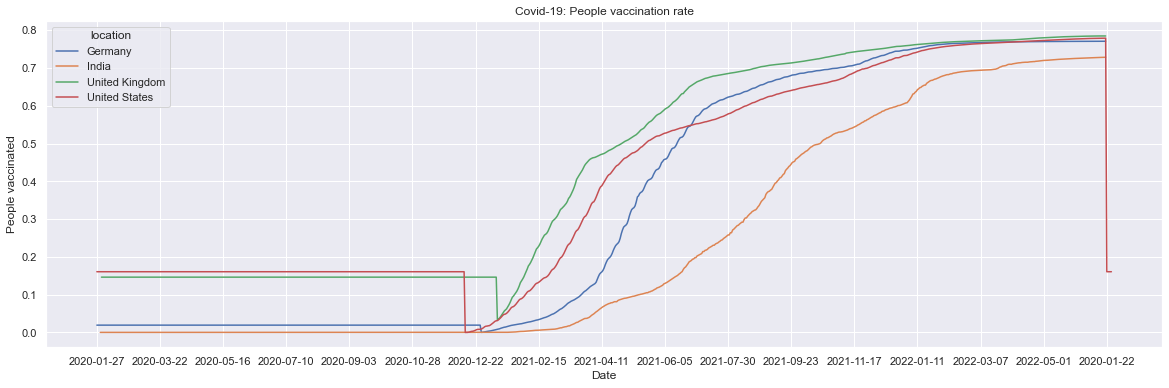

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
loc = plticker.MultipleLocator(base=55.0) # To put a tick every seven days
plt.figure(figsize=(20, 6))  # to change the size of the graph
plt.title(f"Covid-19: People vaccination rate")
plt.ylabel("People vaccinated")
plt.xlabel("Date")
ax = sns.lineplot(data=processed_data, x="date", y="people_vaccinated_rate", hue="location")
ax.xaxis.set_major_locator(loc)